# Analyzing Gun Deaths in the United States (2012–2014)
This study analyzes gun deaths in the United States of America between
2012 and 2014.
This case study will try to answer the following questions:
- What is the number of annual suicide gun deaths in the United States from 2012 to 2014, by gender?
- What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?
- What is the annual number of gun deaths in the United States on average from 2012 to 2014, by cause?
- What is the percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014, by cause?
- What is the percentage of annual suicide gun deaths in the United States from 2012 to 2014, by year?

In [6]:
# Data Gathering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "white", color_codes = True)
%matplotlib inline

In [26]:
dataset = pd.read_csv("full_data.csv")
print(dataset.shape)
dataset.index.name = 'Index'
dataset.columns = map(str.capitalize, dataset.columns)
dataset.head(5)

(100798, 11)


,Unnamed: 0,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
Index,,,,,,,,,,,
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [36]:
# Organise Dataset by Year and then by Month
dataset_gun = dataset
dataset_gun.sort_values(["Year", "Month"], inplace = True)

In [38]:
# Data Analysis
dataset_gun.Sex.value_counts(normalize = False) # 86,349 males and 14,449 females included in the study

Sex
M    86349
F    14449
Name: count, dtype: int64

In [40]:
dataset_byGender = dataset_gun.groupby("Sex").count()
dataset_byGender # There are 14,243 educated females involved iin this study

,Unnamed: 0,Year,Month,Intent,Police,Age,Race,Hispanic,Place,Education
Sex,,,,,,,,,,
F,14449,14449,14449,14449,14449,14446,14449,14449,14386,14243
M,86349,86349,86349,86348,86349,86334,86349,86349,85028,85133


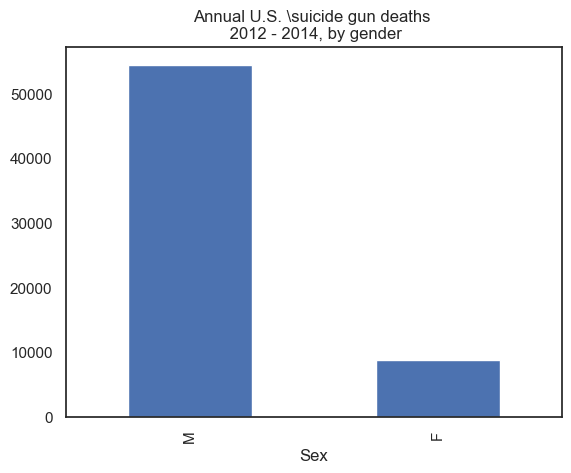

In [52]:
# Data Visualization
# Gun Death by Gender
dataset_suicide_gender = dataset_gun[dataset_gun["Intent"] == "Suicide"]
dataset_suicide_gender.Sex.value_counts(normalize = False).plot.bar(title = "Annual U.S. \\suicide gun deaths \n 2012 - 2014, by gender")
plt.show()

In [106]:
# Gun Death Percentage by Race
dataset_byRace = dataset
dataset_byRace_percent = dataset_byRace.Race.value_counts(ascending = False)*100/100000
dataset_byRace_percent

Race
White                             66.237
Black                             23.296
Hispanic                           9.022
Asian/Pacific Islander             1.326
Native American/Native Alaskan     0.917
Name: count, dtype: float64

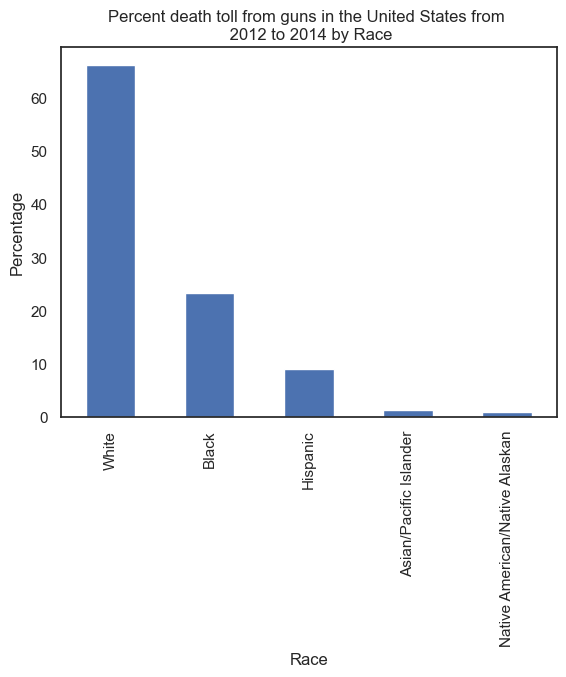

In [108]:
race_counts = dataset_byRace_percent
ax = race_counts.plot.bar(title = "Percent death toll from guns in the United States from \n 2012 to 2014 by Race")
ax.set_ylabel("Percentage")
ax.set_xlabel("Race")
plt.show()

In [110]:
# Visualizing Gun Death by Cause
dataset_byRace["Intent"].value_counts(sort = True, ascending = False)

Intent
Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: count, dtype: int64

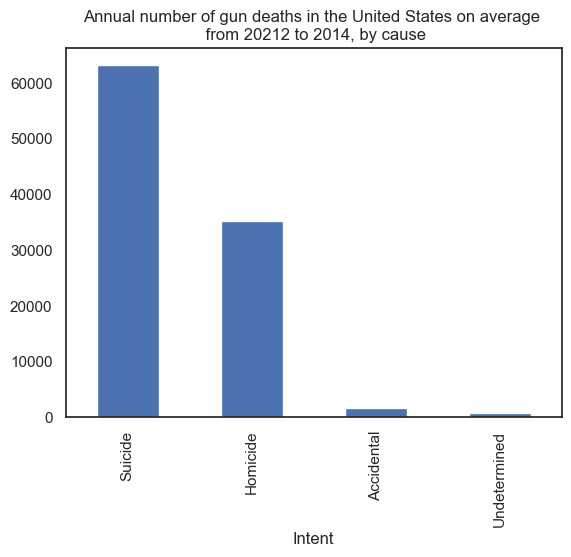

In [116]:
dataset_byRace.Intent.value_counts(sort = True).plot.bar(title = "Annual number of gun deaths in the United States on average \n from 20212 to 2014, by cause")
plt.show()

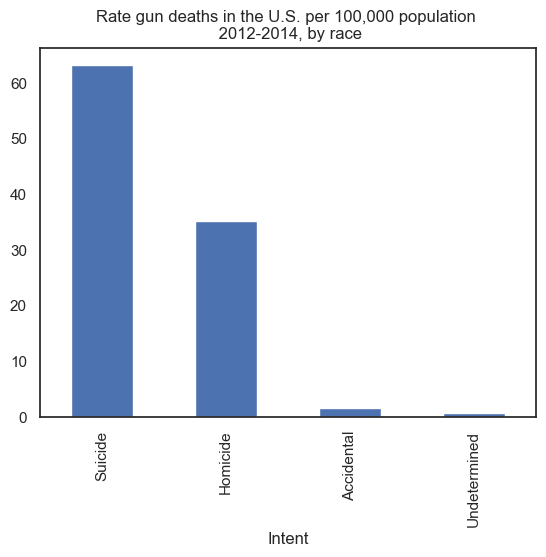

In [122]:
# Number of Suicide and Homicide deaths
intent_counts = dataset_byRace.Intent.value_counts(ascending = False)*100/100000
intent_counts.plot.bar(title = "Rate gun deaths in the U.S. per 100,000 population \n 2012-2014, by race")
plt.show()
# 60 suicide cases for every 100,000 people. In addition, there are 30 homicide cases for every 100,000

In [138]:
# Visualizing Gun Death by Year
dataset_suicide = dataset[ dataset["Intent"] == "Suicide"]
datasetSuicide = dataset_suicide.Year.value_counts(ascending = False) *100/100000
datasetSuicide_year = datasetSuicide.sort_values(ascending = True)
datasetSuicide_year

Year
2012    20.666
2013    21.175
2014    21.334
Name: count, dtype: float64

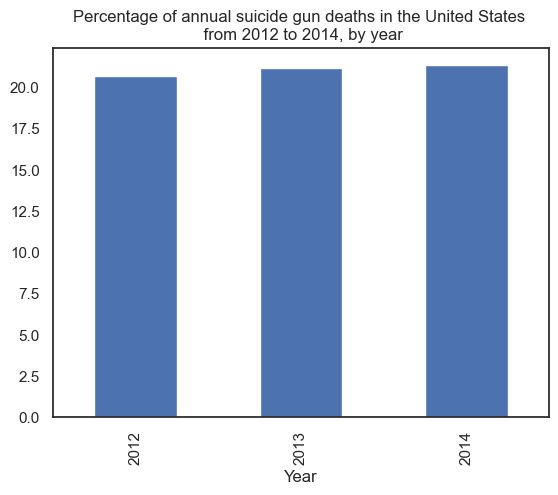

In [144]:
datasetSuicide_year.plot.bar(title = "Percentage of annual suicide gun deaths in the United States \n from 2012 to 2014, by year")
plt.show()

# Key Findings

| Investigation Question | Findings |
|------------------------|----------|
| 1. What is the number of U.S. suicide gun deaths from 2012 to 2014, by gender? | Male suicide gun deaths is over 50,000 while females is below 10,000 which shows how males are more likely to commit suicide with a gun. |
| 2. What is the number of gun deaths in the United States per a 100,000 population from 2012 to 2014? | The highest number of deaths is for white people, then black and then Hispanic |
| 3. What are the annual number of gun deaths in the United States on average from 2012 to 2014, by cause? | There is a high number of suicide and homicide deaths compared to a low number of deaths due to accidents. |
| 4. What is the 100,000 percent of annual guns death tolls in the United States from 2012 to 2014, by cause? | The 100,000 percentages shows that there are 60 suicide cases for every 100,000 people, which somehow is not a high rate. In addition, there are 30 homicide cases for every 100,000 people. |
| 5. What is the percentage of annual suicide gun deaths in the United States from 2012 to 2014, by year? | The analysis shows almost the same number of suicides each year over a period of three years, which means that this is a regular pattern in society. |